# **확률분포의 종류**

- 베르누이 분포
      명령어 : bernoulli
      베르누이 실험 : 결과가 2개 밖에 없는 실험(동전 앞 뒤)
      베르누이의 확률변수 : 이산확률변수{0,1}, {-1,1}
$$Bern(x;μ)={μ^x}{(1-μ)^{(1-x)}}$$
- 이항분포
      binom
- 다항분포
      multinomial
- 정규분포
      norm
- 균일분포
      uniform
- 베타분포
      beta
- 감마분포
      gamma
- t-분포
      t
- 카이제곱분포
      chi2
- etc....

# 모수 지정
평균, 편차

분포의 기댓값, 표준편차

pdf : 확률밀도함수

pmf : 확률질량함수

cdf : 누적확률밀도함수

ppf : cdf의 역함수

In [3]:
import scipy as sp
import scipy.stats

# 표준정규분포 (평균 0, 표준편차 1)
# rv = sp.stats.norm(0,1)
rv = sp.stats.norm(1,2)

In [4]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
from sklearn.datasets import load_iris
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors
from matplotlib.ticker import NullFormatter
from matplotlib import transforms
from matplotlib.colorbar import constrained_layout
from scipy.integrate import simps
from sklearn.impute import SimpleImputer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import koreanize_matplotlib
import string
import scipy as sp
import random
import statsmodels.api as sm
import missingno as msno
import patsy
from patsy import demo_data
from patsy import dmatrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer

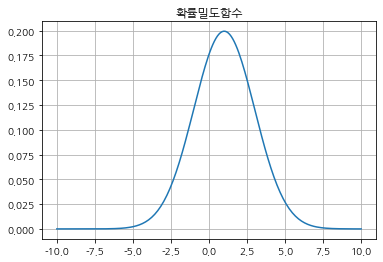

In [7]:
x = np.linspace(-10,10,200)
pdf =rv.pdf(x)
plt.plot(x,pdf)
plt.title('확률밀도함수')
plt.grid()
plt.show()

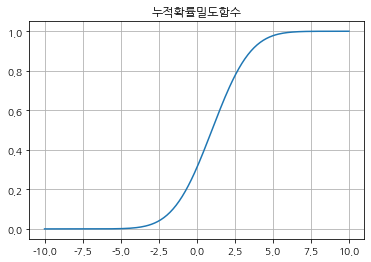

In [8]:
cdf = rv.cdf(x)
plt.plot(x,cdf)
plt.title('누적확률밀도함수')
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


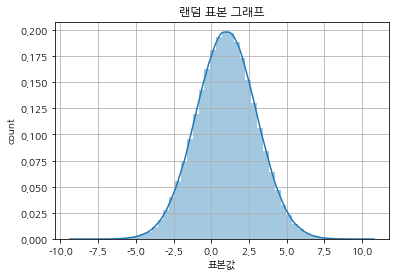

In [9]:
# random value sampling = rvs
sns.distplot(rv.rvs(size=1000000,random_state=0))
plt.title('랜덤 표본 그래프')
plt.xlabel('표본값')
plt.ylabel('count')
plt.grid()
plt.show()

# **변환 확률 변수의 시뮬레이션**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


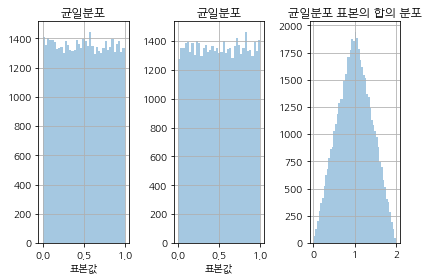

In [10]:
rv1 = sp.stats.uniform()
rv2 = sp.stats.uniform()

np.random.seed(0)
N = 50000
x_1 = rv1.rvs(N)
x_2 = rv2.rvs(N)
x_3 = x_1 + x_2

plt.subplot(131)
sns.distplot(x_1, kde=False)
plt.title('균일분포')
plt.xlabel('표본값')
plt.grid()

plt.subplot(132)
sns.distplot(x_2, kde=False)
plt.title('균일분포')
plt.xlabel('표본값')
plt.grid()

plt.subplot(133)
sns.distplot(x_3, kde=False)
plt.title('균일분포 표본의 합의 분포')
plt.grid()
plt.tight_layout()

plt.show()

### 베르누이 분포
      명령어 : bernoulli
      베르누이 실험 : 결과가 2개 밖에 없는 실험(동전 앞 뒤)
      베르누이의 확률변수 : 이산확률변수{0,1}, {-1,1}
$$Bern(x;μ)={μ^x}{(1-μ)^{(1-x)}}$$

In [11]:
mu = 0.6
rv = scipy.stats.bernoulli(mu)
rv

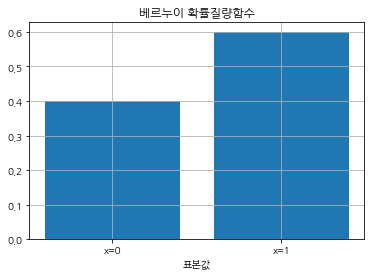

In [12]:
x = [0,1]
plt.bar(x,rv.pmf(x))
plt.xticks([0,1],['x=0','x=1'])
plt.grid()
plt.xlabel('표본값')
plt.title('베르누이 확률질량함수')
plt.show()

In [13]:
x = rv.rvs(100,random_state=0)
x

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


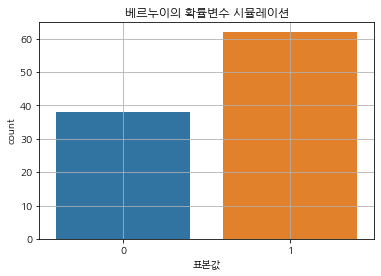

In [14]:
sns.countplot(x)
plt.title('베르누이의 확률변수 시뮬레이션')
plt.xlabel('표본값')
plt.grid()
plt.show()

In [15]:
y = np.bincount(x, minlength=2)/float(len(x))
df = pd.DataFrame({f'이론':rv.pmf([0,1]), '시뮬레이션':y})
df.index=[0,1]
df

,이론,시뮬레이션
0,0.4,0.38
1,0.6,0.62


In [16]:
for i in range(200):
    x = rv.rvs(i,random_state=0)
    y = np.bincount(x, minlength=2)/float(len(x))
    print(f'표본 수가 {i}개 일때 이론값 : {rv.pmf([0,1])}, 표본값 : {y}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


표본 수가 0개 일때 이론값 : [0.4 0.6], 표본값 : [nan nan]
표본 수가 1개 일때 이론값 : [0.4 0.6], 표본값 : [0. 1.]
표본 수가 2개 일때 이론값 : [0.4 0.6], 표본값 : [0.5 0.5]
표본 수가 3개 일때 이론값 : [0.4 0.6], 표본값 : [0.66666667 0.33333333]
표본 수가 4개 일때 이론값 : [0.4 0.6], 표본값 : [0.5 0.5]
표본 수가 5개 일때 이론값 : [0.4 0.6], 표본값 : [0.4 0.6]
표본 수가 6개 일때 이론값 : [0.4 0.6], 표본값 : [0.5 0.5]
표본 수가 7개 일때 이론값 : [0.4 0.6], 표본값 : [0.42857143 0.57142857]
표본 수가 8개 일때 이론값 : [0.4 0.6], 표본값 : [0.5 0.5]
표본 수가 9개 일때 이론값 : [0.4 0.6], 표본값 : [0.55555556 0.44444444]
표본 수가 10개 일때 이론값 : [0.4 0.6], 표본값 : [0.5 0.5]
표본 수가 11개 일때 이론값 : [0.4 0.6], 표본값 : [0.54545455 0.45454545]
표본 수가 12개 일때 이론값 : [0.4 0.6], 표본값 : [0.5 0.5]
표본 수가 13개 일때 이론값 : [0.4 0.6], 표본값 : [0.46153846 0.53846154]
표본 수가 14개 일때 이론값 : [0.4 0.6], 표본값 : [0.5 0.5]
표본 수가 15개 일때 이론값 : [0.4 0.6], 표본값 : [0.46666667 0.53333333]
표본 수가 16개 일때 이론값 : [0.4 0.6], 표본값 : [0.4375 0.5625]
표본 수가 17개 일때 이론값 : [0.4 0.6], 표본값 : [0.41176471 0.58823529]
표본 수가 18개 일때 이론값 : [0.4 0.6], 표본값 : [0.44444444 0.55555556]
표본 수가 19개 일때 이론값 : [

### 이항분포
베르누이 분포에서 실험을 여러번 한 것이 이항분포

$$ X∼Bin(x;N,μ)$$

표본 중 성공일 경우 1, 아닐 경우 0

N개의 표본 중 성공 횟수는 N개의 표본을 모두 더한 것과 같다.
$$x=\Sigma{y_i}$$

확률 질량 함수
$$Bin(x;N,μ) = \binom{N}{x}{μ^x}{(1-μ)^{(N-x)}}$$

In [17]:
N=10
mu=0.6
rv = scipy.stats.binom(N,mu)

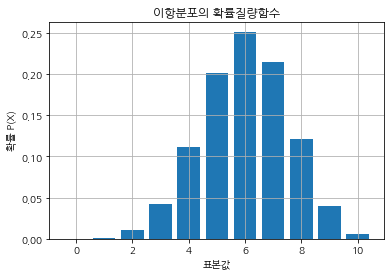

In [26]:
x_ = np.arange(N + 1)
plt.bar(x_, rv.pmf(x_), align='center')
plt.title('이항분포의 확률질량함수')
plt.xlabel('표본값')
plt.ylabel('확률 P(X)')
plt.grid()
plt.show()

###이항분포 시뮬레이션

In [47]:
np.random.seed(0)
x = rv.rvs(100)
x

array([ 6,  5,  6,  6,  6,  5,  6,  4,  3,  6,  5,  6,  6,  4,  8,  8,  9,
        5,  5,  4,  3,  5,  6,  5,  8,  5,  8,  4,  6,  6,  7,  5,  6,  6,
        9,  6,  6,  6,  4,  5,  7,  6,  5,  8,  5,  5,  7,  8,  7,  7,  6,
        6,  2,  8,  7,  8,  5,  7,  6,  7,  8,  8,  5,  8,  7,  7,  5,  8,
        4,  8,  3,  6,  3,  6,  5,  9,  7,  8,  7,  8,  7,  6,  8,  5,  6,
        7,  6,  8,  6,  4,  7,  5,  8,  5,  7,  7,  6,  9,  5, 10])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, **kwargs)>

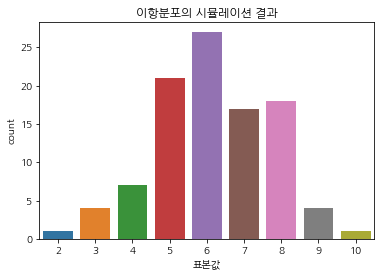

In [48]:
sns.countplot(x)
plt.title('이항분포의 시뮬레이션 결과')
plt.xlabel('표본값')
plt.ylabel

In [49]:
y = np.bincount(x, minlength=N+1)/float(len(x))
df = pd.DataFrame({'이론':rv.pmf(x_), '시뮬레이션':y}).stack()

In [50]:
df = df.reset_index()
df.columns = ['표본값','유형','비율']

In [51]:
df

,표본값,유형,비율
0,0,이론,0.000105
1,0,시뮬레이션,0.000000
2,1,이론,0.001573
3,1,시뮬레이션,0.000000
4,2,이론,0.010617
5,2,시뮬레이션,0.010000
6,3,이론,0.042467
7,3,시뮬레이션,0.040000
8,4,이론,0.111477
9,4,시뮬레이션,0.070000


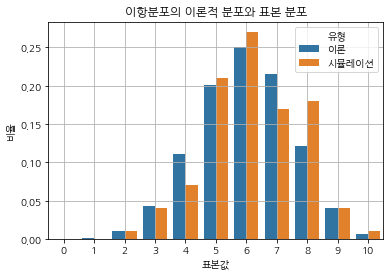

In [52]:
sns.barplot(x='표본값', y='비율', hue='유형', data=df)
plt.title('이항분포의 이론적 분포와 표본 분포')
plt.grid()
plt.show()

### 정규분포

가우스 분포라고도 함

보통 자연현상에 나타나는 수치로, 정규분포로 가정을 많이 함

$$ N(x;μ,{q^2}) = \frac{1}{{(2π{q^2})}^\frac{1}{2}}exp(-\frac{{(x-μ)}^2}{2{q^2}})$$



In [53]:
mu = 0
std = 1
rv = scipy.stats.norm(mu,std)

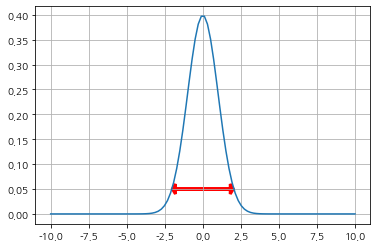

In [58]:
x_ = np.linspace(-10,10,100)
plt.plot(x_,rv.pdf(x_))
plt.arrow(0,0.05,2,0,lw=3,color='r',head_width=0.02,head_length=0.2,length_includes_head=True)
plt.arrow(0,0.05,-2,0,lw=3,color='r',head_width=0.02,head_length=0.2,length_includes_head=True)
plt.grid()
plt.show()

In [61]:
np.random.seed(0)
x = rv.rvs(10000)
x

array([ 1.76405235,  0.40015721,  0.97873798, ...,  0.51687218,
       -0.03292069,  1.29811143])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


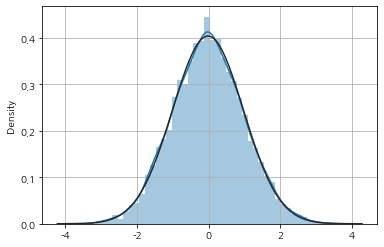

In [62]:
# 표본 생성 결과
sns.distplot(x, fit=scipy.stats.norm)
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


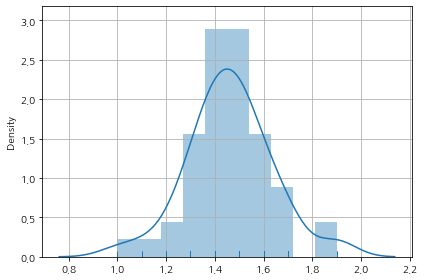

In [72]:
from sklearn.datasets import load_iris
setosa_sepal_length = load_iris().data[:50,2]
sns.distplot(setosa_sepal_length, rug=True)
plt.tight_layout()
plt.grid()
plt.show()

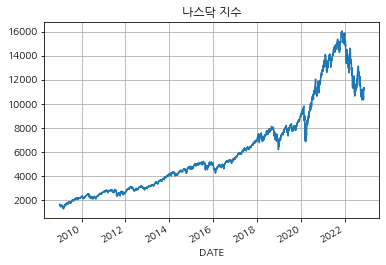

In [77]:
import pandas_datareader.data as web
symbol = 'NASDAQCOM'
data = web.DataReader(symbol, data_source='fred',start='2009-01-01',end='2022-11-20')[symbol]
data = data.dropna()
data.plot(legend=False)
plt.title('나스닥 지수')
plt.grid()
plt.show()

In [80]:
daily_returns = data.pct_change().dropna()
mean = daily_returns.mean()
std = daily_returns.std()
mean*100, std*100

(0.0639025135837965, 1.3346973993012403)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


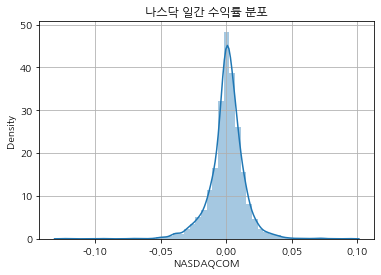

In [82]:
sns.distplot(daily_returns, kde=True)
plt.title('나스닥 일간 수익률 분포')
plt.grid()
plt.show()

## 로그 정규분포

항상 양수인 데이터에 가정할 수 있는 분포

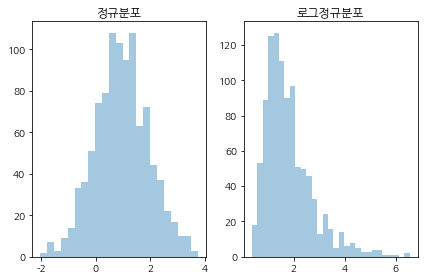

In [88]:
np.random.seed(0)
mu = 1
rv = scipy.stats.norm(mu)
x1 = rv.rvs(1000)
s = .5
x2 = np.exp(s * x1)
fig, ax = plt.subplots(1,2)
sns.distplot(x1, kde=False, ax= ax[0])
ax[0].set_title('정규분포')
sns.distplot(x2, ax=ax[1], kde= False)
ax[1].set_title('로그정규분포')
plt.tight_layout()
plt.show()

# Q-Q 플롯
어떤 확률변수의 분포가 정규분포인지 검사하는 그래프

정규분포를 따를 때, Q-Q플롯은 직선의 형태를 가진다.

정규분포를 따르지 않을 때, Q-Q플롯은 곡선의 형태가 나타난다.

In [89]:
mu = 0
std = 1
rv = scipy.stats.norm(mu,std)

In [90]:
x = rv.rvs(100)
x_sorted = np.sort(x)
x_sorted

array([-1.81807763, -1.775888  , -1.67868836, -1.63880731, -1.43273549,
       -1.42999126, -1.34841309, -1.2406246 , -1.09749665, -1.08485606,
       -1.04817041, -1.04552456, -1.0431295 , -1.03148246, -1.00033035,
       -0.98728669, -0.90730012, -0.8935744 , -0.87916063, -0.86026245,
       -0.85707819, -0.85416126, -0.80008248, -0.79211502, -0.79052302,
       -0.75370447, -0.73331281, -0.71994053, -0.67809546, -0.66060859,
       -0.59922428, -0.5189002 , -0.42231482, -0.41747735, -0.40129781,
       -0.40123471, -0.3166553 , -0.30078388, -0.23110161, -0.20694471,
       -0.15602389, -0.09024385, -0.08837552, -0.06548838, -0.06163805,
       -0.04932407,  0.01633808,  0.03308975,  0.05182039,  0.06749226,
        0.08753147,  0.09721923,  0.09837791,  0.10471403,  0.13768983,
        0.16155927,  0.18949964,  0.20147995,  0.20984948,  0.21496559,
        0.22246316,  0.22425222,  0.22805333,  0.2390336 ,  0.28431452,
        0.30198921,  0.3283013 ,  0.34816924,  0.38141625,  0.40

In [91]:
from scipy.stats.morestats import _calc_uniform_order_statistic_medians

In [92]:
position = _calc_uniform_order_statistic_medians(len(x))

In [93]:
position

array([0.0069075 , 0.01676381, 0.02672744, 0.03669108, 0.04665471,
       0.05661834, 0.06658198, 0.07654561, 0.08650924, 0.09647287,
       0.10643651, 0.11640014, 0.12636377, 0.1363274 , 0.14629104,
       0.15625467, 0.1662183 , 0.17618194, 0.18614557, 0.1961092 ,
       0.20607283, 0.21603647, 0.2260001 , 0.23596373, 0.24592737,
       0.255891  , 0.26585463, 0.27581826, 0.2857819 , 0.29574553,
       0.30570916, 0.31567279, 0.32563643, 0.33560006, 0.34556369,
       0.35552733, 0.36549096, 0.37545459, 0.38541822, 0.39538186,
       0.40534549, 0.41530912, 0.42527275, 0.43523639, 0.44520002,
       0.45516365, 0.46512729, 0.47509092, 0.48505455, 0.49501818,
       0.50498182, 0.51494545, 0.52490908, 0.53487271, 0.54483635,
       0.55479998, 0.56476361, 0.57472725, 0.58469088, 0.59465451,
       0.60461814, 0.61458178, 0.62454541, 0.63450904, 0.64447267,
       0.65443631, 0.66439994, 0.67436357, 0.68432721, 0.69429084,
       0.70425447, 0.7142181 , 0.72418174, 0.73414537, 0.74410

In [94]:
ff = rv.ppf(position)
ff

array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
       -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
       -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
       -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
       -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
       -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
       -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
       -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
       -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
       -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
        0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
        0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
        0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
        0.39732558,  0.42450149,  0.45199463,  0.47983378,  0.50

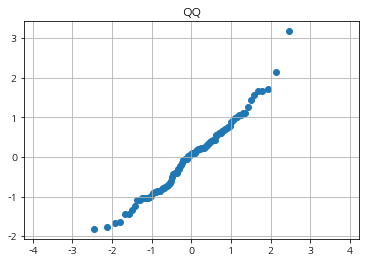

In [97]:
plt.scatter(ff, x_sorted)
plt.title('QQ')
plt.axis('equal')
plt.grid()
plt.show()

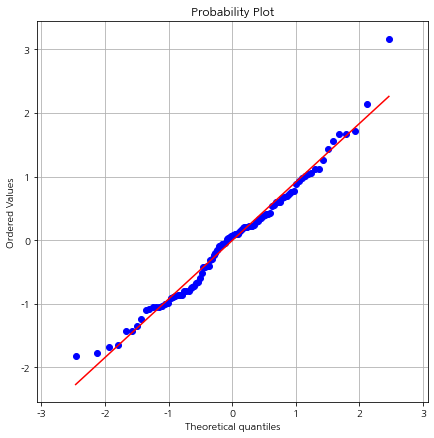

In [98]:
np.random.seed(0)
plt.figure(figsize=(7,7))
sp.stats.probplot(x,plot=plt)
plt.axis('equal')
plt.grid()
plt.show()

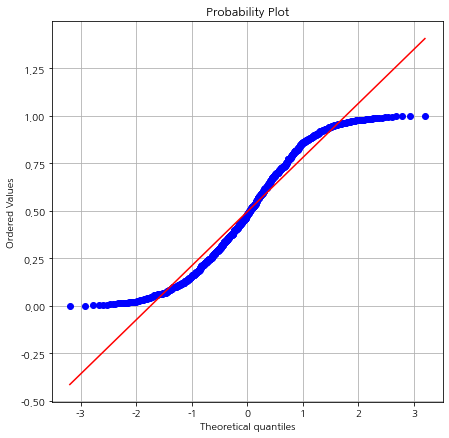

In [102]:
np.random.seed(0)
x = np.random.rand(1000)
plt.figure(figsize=(7,7))
scipy.stats.probplot(x, plot=plt)
plt.grid()
plt.show()

In [106]:
petal_width = load_iris().data[:,3]

In [107]:
petal_width

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

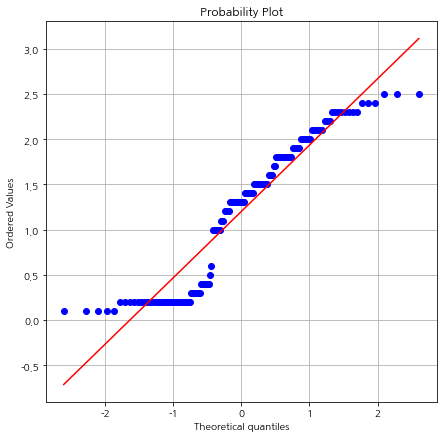

In [109]:
plt.figure(figsize=(7,7))
scipy.stats.probplot(petal_width, plot=plt)
plt.grid()
plt.show()

# 중심극한정리

여러 개의 확률변수의 합이 정규분포와 비슷한 분포를 이루는 현상

확률변수의 평균들의 평균은 확률변수의 수가 무한히 많아지게 되면 모집단의 평균과 분산이 된다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

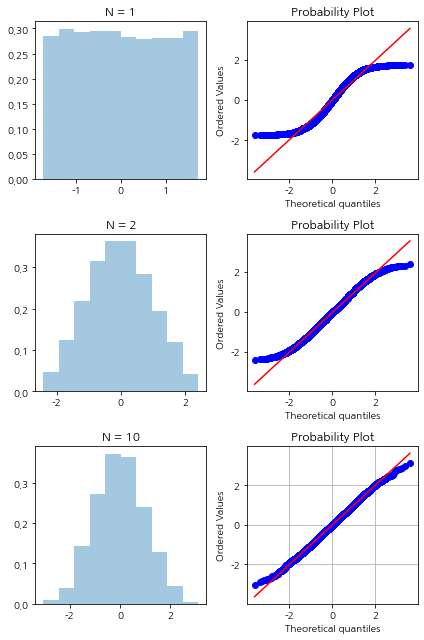

In [112]:
np.random.seed(0)
xx = np.linspace(-2,2,100)

plt.figure(figsize=(6,9))
for i, N in enumerate([1,2,10]):
    X = np.random.rand(5000, N)
    Xbar = (X.mean(axis=1)-0.5)*np.sqrt(12*N)
    ax = plt.subplot(3,2,2*i+1)
    sns.distplot(Xbar, bins=10, kde=False, norm_hist=True)
    ax.set_title(f'N = {N}')
    plt.subplot(3,2,2*i+2)
    sp.stats.probplot(Xbar, plot=plt)

plt.tight_layout()
plt.grid()
plt.show()

# 스튜던트 t-분포

정규분포에서 양 끝단의 분포가 많아지는 분포를 t분포라고 함(fat tail 현상)

정규분포와 유사하지만 좌우측 부분이 더 길고 두꺼운 형태를 띰

정규분포의 평균을 찾을 때 활용되고, 주로 표본의 크기가 작을 때 사용되는 분포

표본의 크기가 작을수록, 정규분포와 가까워짐

- t-분포의 기댓값
      정규본포와 동일 평균
- t-분포의 분산
$$Var[X]=\frac{v}{λ(v-2)}$$    

In [114]:
import pandas_datareader.data as web
symbols = ['SP500','NASDAQCOM','DJCA','NIKKEI225']
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym,data_source='fred')[sym]
data = data.dropna()

In [115]:
data

,SP500,NASDAQCOM,DJCA,NIKKEI225
DATE,,,,
2017-11-27,2601.42,6878.52,7934.05,22495.99
2017-11-28,2627.04,6912.36,8024.11,22486.24
2017-11-29,2626.07,6824.39,8117.11,22597.20
2017-11-30,2647.58,6873.97,8229.31,22724.96
2017-12-01,2642.22,6847.59,8196.75,22819.03
...,...,...,...,...
2022-11-16,3958.79,11183.66,11183.82,28028.30
2022-11-17,3946.56,11144.96,11122.44,27930.57
2022-11-18,3965.34,11146.06,11216.86,27899.77


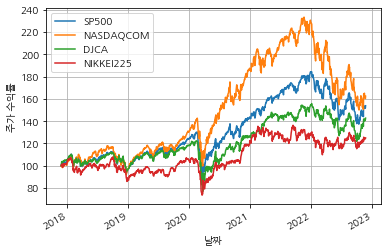

In [116]:
(data/data.iloc[0]*100).plot()
plt.xlabel('날짜')
plt.ylabel('주가 수익률')
plt.grid()
plt.show()

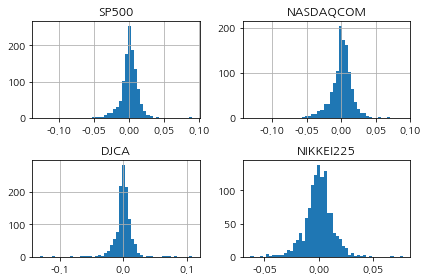

In [119]:
log_returns = np.log(data/data.shift(1))
log_returns.hist(bins=50)
plt.tight_layout()
plt.grid()
plt.show()

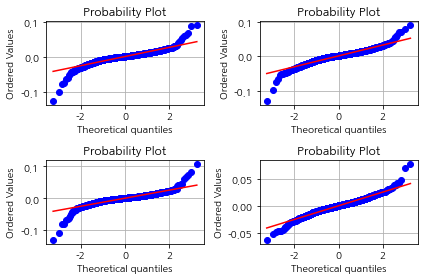

In [122]:
for i, sym in enumerate(symbols):
    ax = plt.subplot(2,2,i+1)
    sp.stats.probplot(log_returns[sym].dropna(),plot=ax)
    plt.grid()
plt.tight_layout()
plt.show()

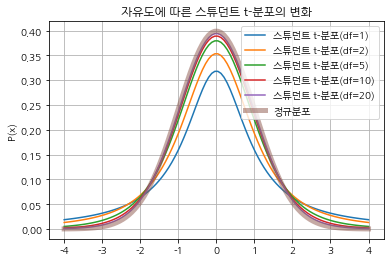

In [125]:
xx = np.linspace(-4,4,100)
for df in [1,2,5,10,20]:
    rv = sp.stats.t(df=df)
    plt.plot(xx,rv.pdf(xx), label=f'스튜던트 t-분포(df={df})')
plt.plot(xx, sp.stats.norm().pdf(xx), label='정규분포', lw=5, alpha=0.5)
plt.title('자유도에 따른 스튜던트 t-분포의 변화')
plt.ylabel('P(x)')
plt.legend()
plt.grid()
plt.show()

# 카이제곱 분포

t-분포와는 다르게 제곱을 하여 양수값만 가지도록 만든 것

얼마나 특별한 사건이 일어나는지를 확인하는 분포

표본집단의 분포가 모집단의 분포를 얼마나 잘 반영하는지 알아낼 때 사용하는 분포

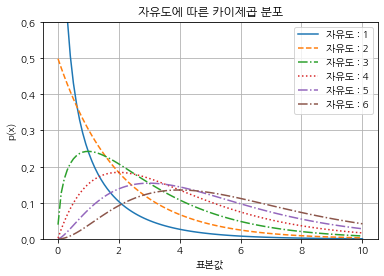

In [133]:
xx = np.linspace(0.01, 10, 100)
dfs = np.arange(1,7)
lss = ['-','--','-.',':','-.','-.']

# 자유도 1,2는 사용하지 않음
for df, ls in zip(dfs, lss):
  rv = scipy.stats.chi2(df=df)
  plt.plot(xx, rv.pdf(xx), ls=ls, label=f"자유도 : {df}")
plt.title('자유도에 따른 카이제곱 분포')
plt.ylim(0,0.6)
plt.xlabel('표본값')
plt.ylabel('p(x)')
plt.legend()
plt.grid()
plt.show()

# F-분포

여러 집단에 대해서 각 집단의 평균이 의미있게 차이가 나는지 측정할 때 사용

선형회귀분석에서 회귀분석모델이 전체 데이터 변동을 잘 설명하고 있는지 비교하기 위해서 사용됨

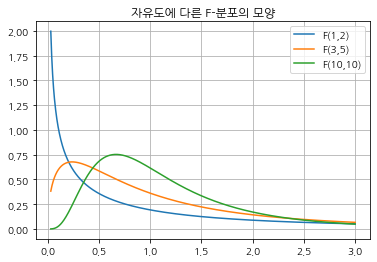

In [136]:
xx = np.linspace(0.03,3,1000)
plt.plot(xx,scipy.stats.f(1,2).pdf(xx), ls='-', label='F(1,2)')
plt.plot(xx,scipy.stats.f(3,5).pdf(xx), ls='-', label='F(3,5)')
plt.plot(xx,scipy.stats.f(10,10).pdf(xx), ls='-', label='F(10,10)')
plt.grid()
plt.legend()
plt.title('자유도에 다른 F-분포의 모양')
plt.show()

# **확률분포의 결정**

확률변수가 베르누이, 이항, 정규분포 중에 어떤 확률분포를 따르는지 알아내고 표본집단의 해당 확률분포의 모수 값을 구하는 작업 실행

    - 데이터가 0이나 1뿐이면 🠒 베르누이 분포
    - 데이터가 범주형(카테고리) 값일 경우 🠒 카테고리 분포
    - 데이터가 0과 1 사이의 실수 값일 경우 🠒 베타분포
    - 데이터가 항상 0 이상일 경우 🠒 로그정규분포, 감마분포, f분포, 카이제곱분포, 지수 등
    - 데이터가 제한이 없고 연속된 실수일 경우 🠒 정규분포, 스튜던트 t-분포, 라플라스분포 등등

데이터의 특성을 알면 어떤 분포를 따를지 추측이 가능함